In [71]:
#Import required libraries
from __future__ import absolute_import, division, print_function
import pathlib
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime as dt
from keras import initializers
from keras.layers import Input, Dense
from keras.models import Model,Sequential
from keras import optimizers
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.externals import joblib
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import subprocess

In [72]:
#Print the files stored in an hdfs folder
p = subprocess.Popen("hdfs dfs -ls /zc_files |  awk '{print $8}'",
    shell=True,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT)

for line in p.stdout.readlines():
    print (line)

b'\n'
b'/zc_files/carbonppm_maunaloa.csv\n'
b'/zc_files/northseaice.csv\n'
b'/zc_files/northsouthice_globaltemps1.csv\n'
b'/zc_files/seaice_and_globaltemps.csv\n'
b'/zc_files/southseaice.csv\n'


In [73]:
#Read some part of the file to get the column name
cat = subprocess.Popen(["hadoop", "fs", "-cat", "/zc_files/seaice_and_globaltemps.csv"], stdout=subprocess.PIPE)
c = 0
for line in cat.stdout:
    line = line.decode('utf-8')
    print(line)
    if c > 1:
        break
    c = c+1

Saving all output to "/Users/daveloaiza/Apps/ZeroCopy/ge-lib-zc-adapters/adapters/seaice_and_globaltemps.csv". Enter "record" with no arguments to stop it.

'Year','Month','Day','ExtentNorth','ExtentSouth','LandAverageTemperature','LandMaxTemperature'

'1978','10','26','10.231','17.624','',''



In [74]:
#Read a file and store in a dataframe
cat = subprocess.Popen(["hadoop", "fs", "-cat", "/zc_files/seaice_and_globaltemps.csv"], stdout=subprocess.PIPE)
sea_global = pd.DataFrame(columns=["Year","Month","Day","ExtentNorth","ExtentSouth","LandAverageTemperature","LandMaxTemperature"])
c = 0
for line in cat.stdout:
    line = line.decode('utf-8')
    str_line = line
    if c > 2:
        string = str_line.split(',')
        if len(string) == 7:
            sea_global.loc[len(sea_global)] = string
    c = c + 1
print(sea_global)

         Year Month   Day ExtentNorth ExtentSouth LandAverageTemperature  \
0      '1978'  '10'  '28'    '10.420'    '17.803'                     ''   
1      '1978'  '10'  '30'    '10.557'    '17.670'                     ''   
2      '1978'  '11'  '01'    '10.670'    '17.527'   '6.3500000000000005'   
3      '1978'  '11'  '03'    '10.777'    '17.486'                     ''   
4      '1978'  '11'  '05'    '10.968'    '17.343'                     ''   
5      '1978'  '11'  '07'    '11.080'    '17.157'                     ''   
6      '1978'  '11'  '09'    '11.189'    '17.028'                     ''   
7      '1978'  '11'  '11'    '11.314'    '16.815'                     ''   
8      '1978'  '11'  '13'    '11.460'    '16.371'                     ''   
9      '1978'  '11'  '15'    '11.539'    '16.176'                     ''   
10     '1978'  '11'  '17'    '11.696'    '15.520'                     ''   
11     '1978'  '11'  '19'    '11.870'    '15.267'                     ''   
12     '1978

In [75]:
#Read some part of the file to get the column name
cat = subprocess.Popen(["hadoop", "fs", "-cat", "/zc_files/carbonppm_maunaloa.csv"], stdout=subprocess.PIPE)
c = 0
for line in cat.stdout:
    line = line.decode('utf-8')
    print(line)
    if c > 1:
        break
    c = c+1

Saving all output to "/Users/daveloaiza/Apps/ZeroCopy/ge-lib-zc-adapters/adapters/carbonppm_maunaloa.csv". Enter "record" with no arguments to stop it.

'YYYY','M','DD','ppm'

'1980','9','14','336.24'



In [76]:
#Read a file and store in a dataframe
cat = subprocess.Popen(["hadoop", "fs", "-cat", "/zc_files/carbonppm_maunaloa.csv"], stdout=subprocess.PIPE)
carbon = pd.DataFrame(columns=["Year","Month","Day","PPM"])
c = 0
for line in cat.stdout:
    line = line.decode('utf-8')
    str_line = line
    if c > 2:
        string = str_line.split(',')
        if len(string) == 4:
            carbon.loc[len(carbon)] = string
    c = c + 1
print(carbon)

        Year Month   Day          PPM
0     '1980'   '9'  '28'   '335.99'\n
1     '1980'  '11'   '2'   '336.97'\n
2     '1980'  '11'  '23'   '337.64'\n
3     '1980'  '12'  '21'   '338.52'\n
4     '1980'  '12'  '28'   '338.60'\n
5     '1981'   '4'  '19'   '342.54'\n
6     '1981'   '6'  '28'   '341.71'\n
7     '1981'   '8'   '2'   '339.30'\n
8     '1981'   '8'  '16'   '338.18'\n
9     '1981'   '8'  '30'   '337.60'\n
10    '1981'   '9'  '27'   '336.24'\n
11    '1981'  '11'   '1'   '338.13'\n
12    '1981'  '11'  '22'   '339.23'\n
13    '1982'   '1'  '10'   '340.75'\n
14    '1982'   '2'  '14'   '341.34'\n
15    '1982'   '2'  '21'   '341.97'\n
16    '1982'   '3'  '14'   '342.71'\n
17    '1982'   '3'  '21'  '-999.99'\n
18    '1982'   '4'  '18'  '-999.99'\n
19    '1978'   '7'  '23'   '335.74'\n
20    '1978'   '8'   '6'   '334.64'\n
21    '1978'  '10'   '8'   '331.85'\n
22    '1978'  '12'  '10'   '334.96'\n
23    '1974'   '6'   '2'   '332.32'\n
24    '1979'   '1'  '21'   '336.93'\n
25    '1974'

In [77]:
#Join operation to find out same records 
dataset = pd.merge(sea_global,carbon,on=['Year','Month','Day'],how='inner')
print(dataset)

       Year Month   Day ExtentNorth ExtentSouth LandAverageTemperature  \
0    '1978'  '11'  '19'    '11.870'    '15.267'                     ''   
1    '1978'  '12'  '17'    '13.807'    '10.239'                     ''   
2    '1978'  '12'  '31'    '14.585'     '7.283'                     ''   
3    '1979'  '10'  '21'     '9.295'    '17.738'                     ''   
4    '1979'  '11'  '18'    '11.010'    '15.256'                     ''   
5    '1979'  '12'  '16'    '13.322'     '9.125'                     ''   
6    '1979'  '12'  '30'    '14.092'     '6.124'                     ''   
7    '1980'  '10'  '19'     '9.389'    '18.536'                     ''   
8    '1980'  '11'  '16'    '11.217'    '16.394'                     ''   
9    '1980'  '11'  '30'    '12.626'    '13.876'                     ''   
10   '1980'  '12'  '14'    '13.685'    '10.702'                     ''   
11   '1980'  '12'  '28'    '14.172'     '7.178'                     ''   
12   '1981'  '10'  '18'     '9.062'   

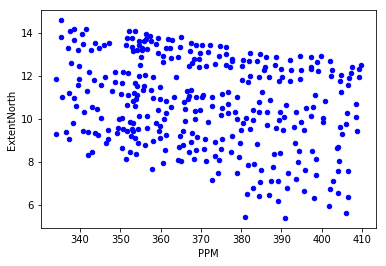

In [78]:
#Plot the results
dataset['PPM'] = dataset['PPM'].apply(lambda x: x.replace("'",""))
dataset['PPM'] = dataset['PPM'].astype(float)
dataset['ExtentNorth'] = dataset['ExtentNorth'].apply(lambda x:x.replace("'",""))
dataset['ExtentNorth'] = dataset['ExtentNorth'].astype(float)
dataset = dataset[dataset['PPM']>0] #drop the negative values
dataset.plot(kind='scatter',x='PPM',y='ExtentNorth',color='blue')
plt.show()

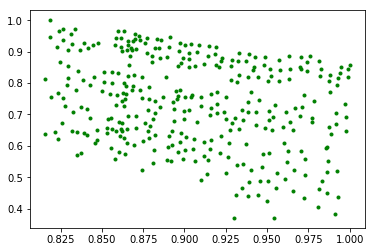

In [79]:
#Normalizing the data set
dataset.PPM = dataset['PPM']/dataset['PPM'].max()
dataset.ExtentNorth = dataset['ExtentNorth']/dataset['ExtentNorth'].max()
plt.plot(dataset.PPM,dataset.ExtentNorth,'g.')

0.405947271095252


['kmeans_cluster.model']

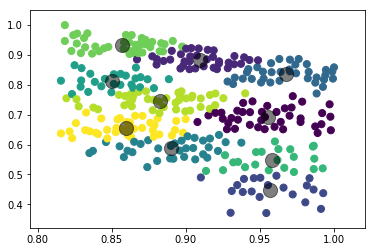

<Figure size 432x288 with 0 Axes>

In [80]:
#K-means cluster analysis on the data set
X = np.array(list(zip(dataset.PPM,dataset.ExtentNorth)))
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
print(kmeans.inertia_) #Get the Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
#finally save the model
file_name = 'kmeans_cluster.model'
joblib.dump(kmeans,file_name)

In [81]:
#Load and test the model with a data set
loaded_model = joblib.load(file_name)
ppm = 0.9
extN = 0.8
dataset = [[ppm,extN]]
print('ppm and extN belongs to cluster:',loaded_model.predict(dataset))

ppm and extN belongs to cluster: [5]
